Lesson 10

Author: Rodrigo MM Santiago @rodrigommsantiago

In [1]:
# Modules...
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting
import pywt                     # wavelets

# inline plotting
%matplotlib inline 

# 3D plots
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Wavelet functions
from scipy.signal import morlet,cwt,spectrogram

import pylab as pl          # animations
from IPython import display # display tools

Amplitude envelopes with wavelets:

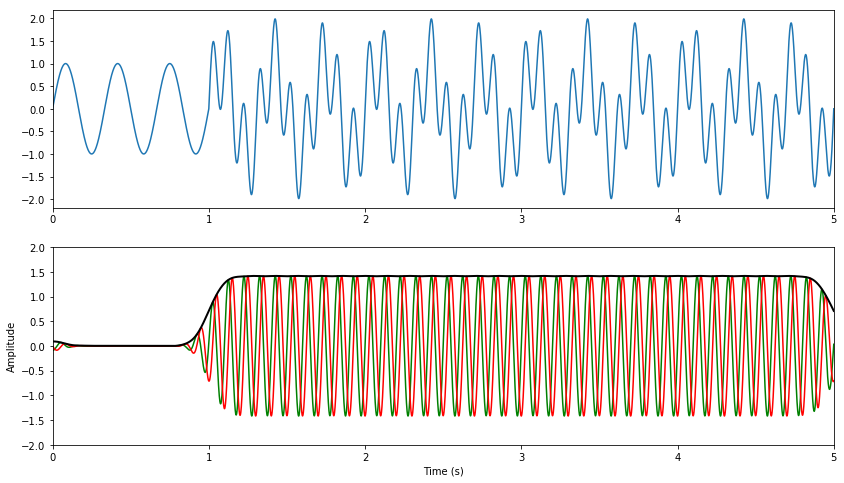

In [2]:
# Morlet Wavelet
srate = 1000
dt = 1./srate
t_psi = np.arange(-.35,.350001,dt)

# cosine
fc = 10. # central frequency (Hz)
cosine = np.exp(1j*2*np.pi*fc*t_psi)

# gaussian
a = 1. # peak height
b = 0. # central position (mean)
c = 5./(2*np.pi*fc) # stardad deviation ('width')
gaussian = a*np.exp(-(t_psi-b)**2/(2*c**2))

# morlet wavelet
psi = cosine*gaussian

# LFP signal
t_lfp = np.arange(0,5.00001,dt)
f1 = 10. # LFP high frequency
LFP = np.sin(2*np.pi*f1*t_lfp);
LFP[:1000] = 0.
f2 = 3. # LFP low frequency
LFP = LFP + np.sin(2*np.pi*f2*t_lfp);

plt.figure(figsize=(14,8))
plt.subplot(211)
plt.plot(t_lfp,LFP)
plt.xlim(0,5)

plt.subplot(212)
# plt.plot(t_psi,np.real(psi),'g')
# plt.plot(t_psi,np.imag(psi),'r')

WaveletTransform = np.convolve(LFP,psi,'same')
WaveletTransform = WaveletTransform/np.sum(np.real(psi)**2)

WaveletAmplitude = np.abs(WaveletTransform)

plt.plot(t_lfp,np.real(WaveletTransform),'g')
plt.plot(t_lfp,np.imag(WaveletTransform),'r')
plt.plot(t_lfp,WaveletAmplitude,'k',linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-2,2)
plt.xlim(0,5);

Morlet wavelet via 'morlet' function:

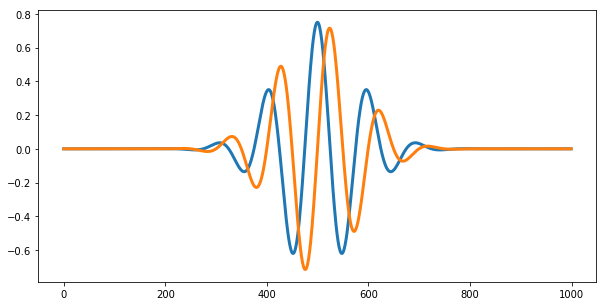

In [3]:
cfreq = 10. # wavelet central frequency

M = 10*srate/cfreq  # number of samples
w = 5 # width
s = 1 # scale factor

#t = np.arange(M)*dt/(w*s)
psi = morlet(M,w,s)

plt.figure(figsize=(10,5))
plt.plot(np.real(psi),linewidth=3)
plt.plot(np.imag(psi),linewidth=3);
# plt.plot(t,np.real(psi),linewidth=3)
# plt.plot(t,np.imag(psi),linewidth=3)
# plt.xlim(0,max(t))
# plt.xlabel('Time (s)',size=13)
# plt.ylabel('Amplitude',size=13)
# plt.plot(t,np.cos(2*np.pi*cfreq*t),'k',alpha=0.2);

Wavelet transform via 'cwt' function from 'pywt':

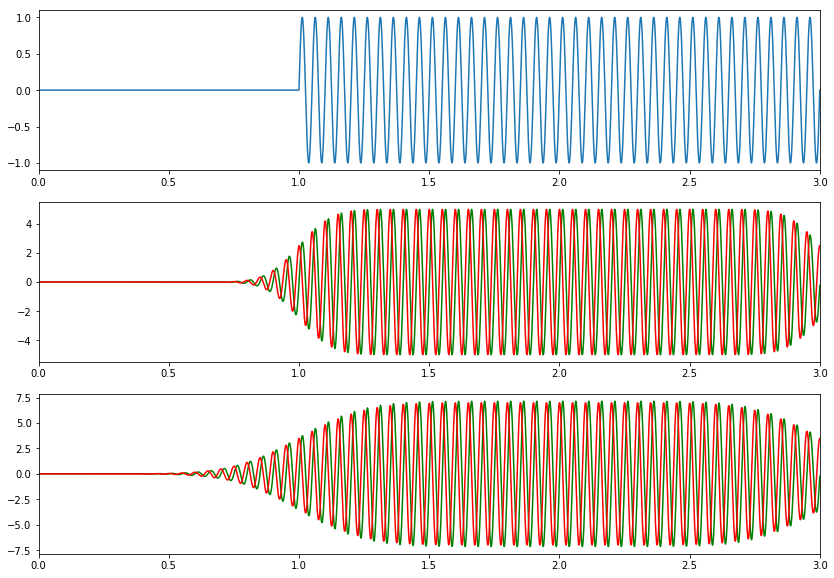

In [4]:
t_lfp = np.arange(0,3.0001,dt)
LFP = np.sin(2*np.pi*20*t_lfp)
LFP[:1000] = 0.

plt.figure(figsize=(14,10))
plt.subplot(311)
plt.plot(t_lfp,LFP)
plt.xlim(0,3)

freq = 20 # analyzed frequency
motherwave = 'cmor2-2' # mother wavelet
# gets which scale corresponds to a given frequency
scale = pywt.central_frequency(motherwave)/(freq*dt)
# Wavelet Transform
WaveletTransform,freqs = pywt.cwt(LFP,scale,motherwave,dt)

plt.subplot(312)
plt.plot(t_lfp,np.real(WaveletTransform[0]),'g')
plt.plot(t_lfp,np.imag(WaveletTransform[0]),'r')
plt.xlim(0,3)

freq = 20 # analyzed frequency
motherwave = 'cmor2-4' # mother wavelet
# gets which scale corresponds to a given frequency
scale = pywt.central_frequency(motherwave)/(freq*dt)
# Wavelet Transform
WaveletTransform,freqs = pywt.cwt(LFP,scale,motherwave,dt)

plt.subplot(313)
plt.plot(t_lfp,np.real(WaveletTransform[0]),'g')
plt.plot(t_lfp,np.imag(WaveletTransform[0]),'r')
plt.xlim(0,3);

Time-Frequency Decomposition (TFD)

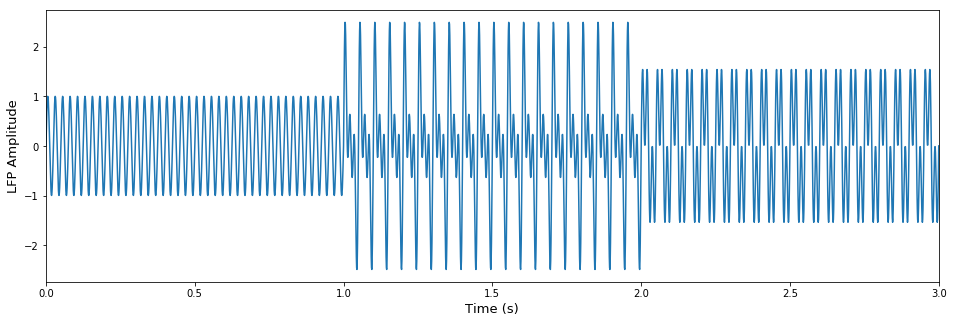

In [5]:
### LFP signal
LFP = np.sin(2*np.pi*20*t_lfp)+np.sin(2*np.pi*60*t_lfp)
LFP[:1000] = 0.
LFP[:2000] = LFP[:2000] + np.sin(2*np.pi*40*t_lfp[:2000])

plt.figure(figsize=(16,5))
plt.plot(t_lfp,LFP)
plt.xlim(0,3)
plt.xlabel('Time (s)',size=13)
plt.ylabel('LFP Amplitude',size=13);

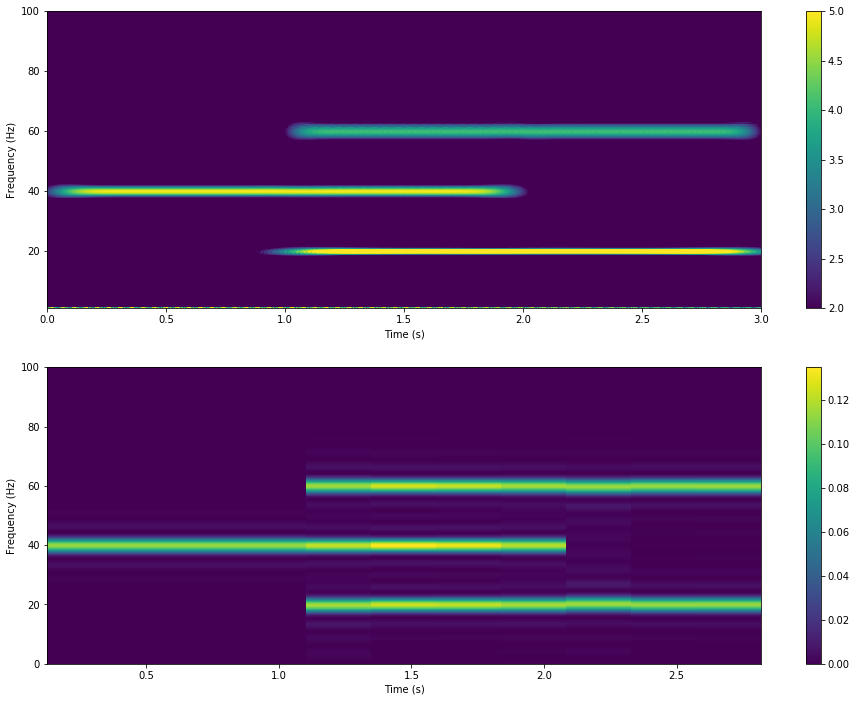

In [6]:
### TFD via Wavelet
freq = np.arange(1,100,.1)
motherwavelet = 'cmor3-7'
scale = pywt.central_frequency(motherwave)/(freq*dt)
# Wavelet Transform
WaveletTransform,freqs = pywt.cwt(LFP,scale,motherwave,dt)
TFD1 = abs(WaveletTransform)

plt.figure(figsize=(16,12))
plt.subplot(211)
plt.pcolormesh(t_lfp,freqs,TFD1)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.clim([2,5])

### TFD via Fourier
win = int(0.25*srate)
overlap = int(0.005*srate)
F,T,TFD2 = spectrogram(LFP,srate,nperseg=win,noverlap=overlap,nfft=2**13)

plt.subplot(212)
plt.pcolormesh(T,F,TFD2)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0,100)
plt.colorbar();